In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

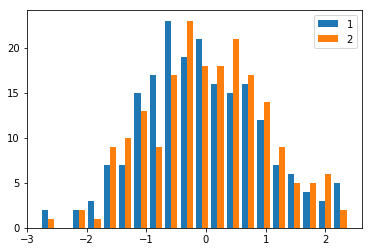

In [2]:
np.random.seed(0)
#標準正規分布に従う200×2の行列
X_xor=np.random.randn(200,2)
plt.hist(X_xor,bins=20,label=['1','2'])
plt.legend()
plt.show()

In [3]:
#2つの引数に対して排他的論理和を実行
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
#排他的論理和の値が真なら1、偽なら-1を割り当て
y_xor=np.where(y_xor, 1, -1)
#2つの引数に対して排他的論理和を実行
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
#排他的論理和の値が真なら1、偽なら-1を割り当て
y_xor=np.where(y_xor, 1, -1)

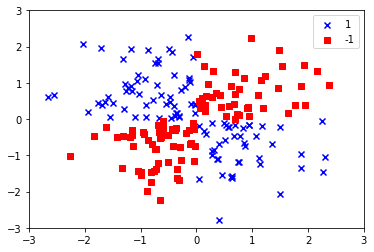

In [4]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

In [5]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers=('s','x','o','^','v')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max=X[:,0].min()-1,X[:,0].max()+1
  x2_min, x2_max=X[:,1].min()-1,X[:,1].max()+1
  
  xx1,xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
  
  Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  z=Z.reshape(xx1.shape)
  
  plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
  
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
    
  if test_idx:
    X_test, y_test=X[test_idx,:],y[test_idx]
    plt.scatter(X_test[:,0],X_test[:,1],c='gray',
               alpha=1.0, linewidths=1, marker='v',
               s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


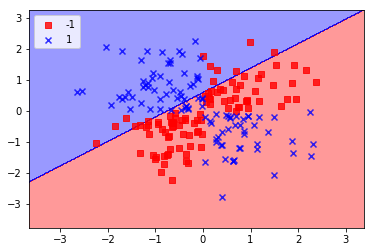

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


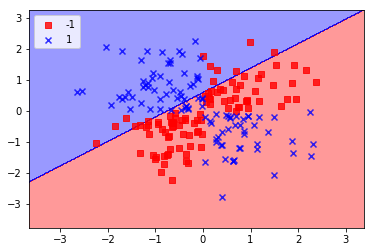

In [6]:
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, 
                      classifier=svm)
plt.legend(loc='upper left')
plt.show()
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor, 
                      classifier=svm)
plt.legend(loc='upper left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


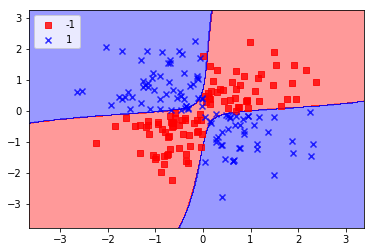

In [7]:
svm=SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()